In [1]:
import sympy as sp
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import List

# Methods

This method is used to convert between a function and a list of points sampled from the function

In [2]:
def sample_function_in_range(f:sp.Expr, a, b, n) -> np.ndarray:
    # Set of points linearly spaced between a and b
    x = np.linspace(a, b, n)
    # Compute the value of the function at each point in x
    y = np.array(list(map(lambda var: f.subs('x', var), x)))
    return y

# Trapezoidal method

In [3]:
def trapezoidal_method(points_y : np.ndarray, h) -> float:
    n = len(points_y) -1
    
    if n+1 < 2:
        raise ValueError("n must be greater than 1")

    # This will create the expansion for the sum
    weights = np.array([1.0, 1.0])
    summation = sum(
        map(lambda sub_interval: np.dot(sub_interval, weights), 
            map(lambda index: points_y[index:index+2], range(0, n, 1))
          )
        )

    return h * (1 / 2) * summation

def trapezoidal_method_error(f : sp.Expr, a, b, n) -> float:
    # Compute the second derivative of the function
    f_2 = sp.diff(f, 'x', 2)
    h = (b - a) / n
    random_value_on_interval = np.random.uniform(a, b)
    return -h**2 / 12 * f_2.subs('x', random_value_on_interval)

## Tests for trapezoidal method

In [4]:
a = 0
b = 1
n = 10
x = sp.symbols("x")
f = sp.exp(x)
h = (b - a) / n
integral = trapezoidal_method(sample_function_in_range(f, a, b, n+1), h)
print(f"Integral of exp(x) from {a} to {b} using {n} points: {integral}")

Integral of exp(x) from 0 to 1 using 10 points: 1.71971349138931


In [5]:
error_expected = 10e-3
n=0
while True:
    n += 1
    error = trapezoidal_method_error(f, a, b, n)
    if abs(error) < error_expected:
        break
print(f"Number of points needed to get an error less than 10e-3: {n}, {1/(abs(error))}")

Number of points needed to get an error less than 10e-3: 4, 116.990980584056


# 1/3 Simpson Method

In [6]:
def simpson_one_third_method(points_y:np.ndarray, h) -> float:
    n = len(points_y) -1
    
    if n % 2 != 0:
        raise ValueError("The number of points a multiple of 2")

    # Compute the integral using the Simpson's three eight rule
    weights = np.array([1.0, 4.0, 1.0])
    summation = sum(
        map(lambda sub_interval: np.dot(sub_interval, weights), 
            map(lambda index: points_y[index:index+3], range(0, n, 2))
          )
        )

    return h * (1 / 3) * summation

## Tests for 1/3 Simpson Method

In [7]:
a = 0
b = 1
n = 10
x = sp.symbols("x")
f = sp.exp(x)
h = (b - a) / n
integral = simpson_one_third_method(sample_function_in_range(f, a, b, n+1), h)
print(f"Integral of exp(x) from {a} to {b} using {n} points: {integral}")

Integral of exp(x) from 0 to 1 using 10 points: 1.71828278192482


#  3/8 Simpson method

In [8]:
def simpson_three_eights_method(point_y:np.ndarray, h) -> float:
    n = len(point_y) -1

    if n % 3 != 0:
        raise ValueError("The number of points must be a multiple of 3")
    
    # Compute the integral using the Simpson's three eight rule
    weights = np.array([1.0, 3.0, 3.0, 1.0])
    summation = sum(
        map(lambda sub_interval: np.dot(sub_interval, weights),
            map(lambda index: point_y[index:index+4], range(0, n, 3))
          )
        )

    return h * (3 / 8) * summation

def simpson_three_eights_method_error(f : sp.Expr, a, b, n):
    # Compute the fourth derivative of the function
    f_4 = sp.diff(f, 'x', 4)
    h = (b - a) / n
    random_value_on_interval = np.random.uniform(a, b)
    return -h**4 / 80 * f_4.subs('x', random_value_on_interval)

## Tests for 3/8 Simpson method

In [9]:
a = 0
b = 1
n = 9
x = sp.symbols("x")
f = sp.exp(x)
h = (b - a) / n
integral = simpson_three_eights_method(sample_function_in_range(f, a, b, n+1), h)
print(f"Integral of exp(x) from {a} to {b} using {n} points: {integral}")

Integral of exp(x) from 0 to 1 using 9 points: 1.71828509252926


# Euler method for differentiation

In [10]:
def euler_method(f, x0, y0, h, n):
    x = x0
    y = y0
    for _ in range(n):
        y = y + h * f(x, y)
        x = x + h
    return y

## Tests for Euler method

In [11]:
f = lambda x, y : -x * y
h = 0.1
n = 10
x0 = 0
y0 = 1

euler_method(f, x0, y0, h, n)

0.6281565095552948

# Runge-Kutta 2nd order

In [12]:
def runge_kutta_2nd_order(f, x0, y0, h, n):
    x = x0
    y = y0
    for _ in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h, y + k1)
        y = y + (1/2) * (k1 + k2)
        x = x + h
    return y

## Tests for Runge-Kutta 2nd order method

In [13]:
f = lambda x, y : -x * y
h = 0.1
n = 9
x0 = 0
y0 = 1

runge_kutta_2nd_order(f, x0, y0, h, n)

0.6670895521276202

# Runge-Kutta 4th order

In [14]:
def runge_kutta_4th_order(f, x0, y0, h, n):
    x = x0
    y = y0
    for _ in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + (1/2) * k1)
        k3 = h * f(x + h/2, y + (1/2) * k2)
        k4 = h * f(x + h, y + k3)
        y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        x = x + h
    return y

## Tests for Runge-Kutta 4th order

In [15]:
f = lambda x, y : -x * y
h = 0.1
n = 9
x0 = 0
y0 = 1

runge_kutta_4th_order(f, x0, y0, h, n)

0.6669768445306272

# Exercises

# 1 
The work done by a force $ F(x) $, that has an angle between the movement direction and the force, given by $ \theta (x) $, can be obtained with the following formula:

$ W = \int_{x_0}^{x_n}{F(x)cos(\theta(x)) dx} $

Where the values $ x_0 $ and $ x_n $ are the starting and ending positions.

Calculate the best approximation to the work done, W, by pulling a block from position 0 to 30 knowing that the force and the angle are given bellow

In [16]:
x = [0, 2.5, 5, 15, 20, 25, 30]
f_x = [0, 7, 9, 14, 10.5, 12, 5]
theta_x = [0.5, 0.9, 1.4, 0.9, 1.3, 1.48, 1.5]

## a) 
Apply the Simpson one third method in the first interval from 0 to 5

In [31]:
i_start = 0
i_end = 2

n = 2
a = x[i_start]
b = x[i_end]
h = (b - a) / n

points = [f_x[i] * math.cos(theta_x[i]) for i in range(i_start, i_end+1)]
integral = simpson_one_third_method(points, h)
print(f"The approximate value of the function W is {integral} in the interval [{a}, {b}]")
print(h)

The approximate value of the function W is 15.778986164733976 in the interval [0, 5]
2.5


## b)
Apply the Trapezoidal method on the second interval

In [18]:
i_start = 2
i_end = 3

n = 1
a = x[i_start]
b = x[i_end]
h = (b - a) / n

points = [f_x[i] * math.cos(theta_x[i]) for i in range(i_start, i_end+1)]
integral = trapezoidal_method(points, h)
print(f"The integral of the function is {integral} in the interval [{a}, {b}]")
print(h)

The integral of the function is 51.16121920945736 in the interval [5, 15]
10.0


## c)
Apply the Simpson trhee eights method to the third interval

In [19]:
i_start = 3
i_end = 6

n = 3
a = x[i_start]
b = x[i_end]
h = (b - a) / n

points = [f_x[i] * math.cos(theta_x[i]) for i in range(i_start, i_end+1)]
integral = simpson_three_eights_method(points, h)
print(f"The integral of the function is {integral} in the interval [{a}, {b}]")
print(h)

The integral of the function is 38.89990714972025 in the interval [15, 30]
5.0


# 2
For the problems with starting values

A) $
\begin{cases}
   y' = x^2 + y^2 \\
   y(0) = 0
\end{cases}
$

B) $
\begin{cases}
   y' = x + y \\
   y(0) = 1
\end{cases}
$

In [20]:
f1 = lambda x, y : np.power(x, 2) + np.power(y, 2)
f2 = lambda x, y : x + y

x0_f1 = 0
y0_f1 = 0

x0_f2 = 0
y0_f2 = 1

## a)
Calculate $y(0.5)$ for the problem A and $y(0.2)$ for the problem B using the Euler method. Consider $ h = 0.1 $ and $ h = 0.05 $

Problem A

In [21]:
target_x = 0.5

In [22]:
h = 0.1
iterations = int((target_x - x0_f1) / h)
euler_method(f1, x0_f1, y0_f1, h, iterations)

0.030022207380957063

In [23]:
h = 0.05
iterations = int((target_x - x0_f1) / h)
euler_method(f1, x0_f1, y0_f1, h, iterations)

0.035682619628341176

Problem B

In [24]:
target_x = 0.2

In [25]:
h = 0.1
iterations = int((target_x - x0_f2) / h)
euler_method(f2, x0_f2, y0_f2, h, iterations)

1.2200000000000002

In [26]:
h = 0.05
iterations = int((target_x - x0_f2) / h)
euler_method(f2, x0_f2, y0_f2, h, iterations)

1.2310124999999998

## b)
Compare the results obtained with $h = 0.1$ and $h=0.05$ on the previous exercise

To compare the results, I will use a better solver (Runge Kutta with 100 points) to reach a greater precision and plot the results to see what step size had the least error

In [27]:
# Modified euler method to output intermediate values
def euler_method_modified(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]
    for _ in range(n):
        y_values.append(y_values[-1] + h * f(x_values[-1], y_values[-1]))
        x_values.append(x_values[-1] + h)
    return x_values, y_values

# Modified Runge Kunta 4th order method to output intermediate values
def runge_kutta_4th_order_modified( f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]
    for _ in range(n):
        k1 = h * f(x_values[-1], y_values[-1])
        k2 = h * f(x_values[-1] + h/2, y_values[-1] + (1/2) * k1)
        k3 = h * f(x_values[-1] + h/2, y_values[-1] + (1/2) * k2)
        k4 = h * f(x_values[-1] + h, y_values[-1] + k3)
        y_values.append(y_values[-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4))
        x_values.append(x_values[-1] + h)
    return x_values, y_values

Problem A

$ y(0.5) $

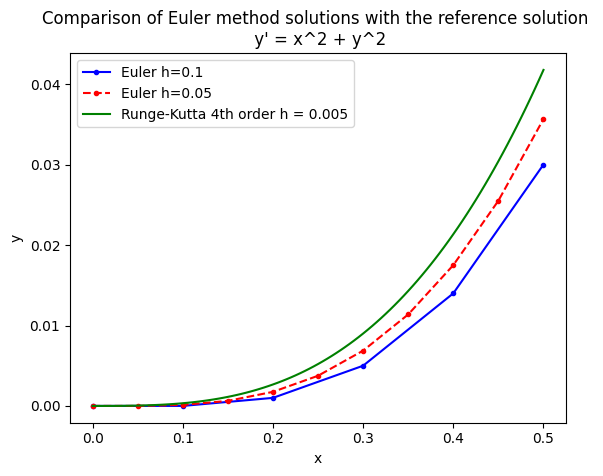

In [28]:
def f(x, y):
    return x**2 + y**2

t_end = 0.5

# Solve the ODE using Euler's method for both h values
h1 = 0.1
x_values_h1, y_values_h1 = euler_method_modified(f, x0_f1, y0_f1, h1, int(t_end / h1))

h2 = 0.05
x_values_h2, y_values_h2 = euler_method_modified(f, x0_f1, y0_f1, h2, int(t_end / h2))

# Solve the ODE using a more accurate numerical solver
it = 100
h = t_end / it
runge_x, runge_y = runge_kutta_4th_order_modified(f, x0_f1, y0_f1, h, it)

# Plotting
plt.plot(x_values_h1, y_values_h1, 'b.-', label='Euler h=0.1')
plt.plot(x_values_h2, y_values_h2, 'r.--', label='Euler h=0.05')
plt.plot(runge_x, runge_y, 'g-', label=f'Runge-Kutta 4th order h = {h}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Euler method solutions with the reference solution \n y\' = x^2 + y^2')
plt.show()

Problem B

$ y(0.2)$

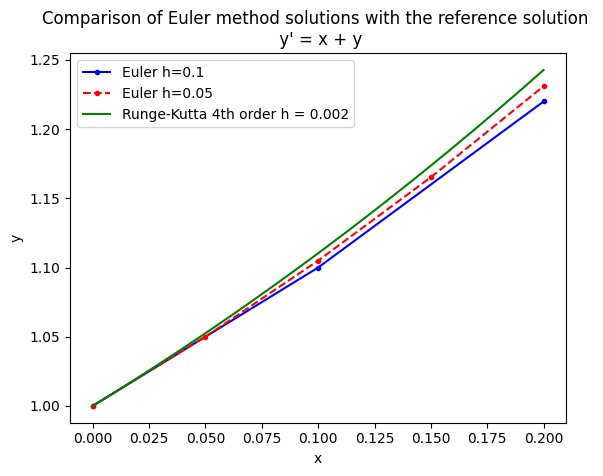

In [29]:
def f(x, y):
    return x + y

t_end = 0.2

# Solve the ODE using Euler's method for both h values
h1 = 0.1
x_values_h1, y_values_h1 = euler_method_modified(f, x0_f2, y0_f2, h1, int(t_end / h1))

h2 = 0.05
x_values_h2, y_values_h2 = euler_method_modified(f, x0_f2, y0_f2, h2, int(t_end / h2))

# Solve the ODE using a more accurate numerical solver
it = 100
h = t_end / it
runge_x, runge_y = runge_kutta_4th_order_modified(f, x0_f2, y0_f2, h, it)

# Plotting
plt.plot(x_values_h1, y_values_h1, 'b.-', label='Euler h=0.1')
plt.plot(x_values_h2, y_values_h2, 'r.--', label='Euler h=0.05')
plt.plot(runge_x, runge_y, 'g-', label=f'Runge-Kutta 4th order h = {h}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Euler method solutions with the reference solution \n y\' = x + y')
plt.show()

In both cases the lower the step size (h), more precise the result, this is expected since the Euler method has an error that is proportional to the step size. In order to achieve this greater precision, more iterations are necessary what makes the lower step size more computationally expensive to calculate.